In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [4]:
#loading the dataset
df=pd.read_csv('/kaggle/input/hepatitis-data/hepatitis_csv.csv')
#loading the datset
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [5]:
#getting preliminary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [26]:
#creating the preprocessing function
def preprocessing_input(df):
    df=df.copy()
    #creating a list of continuous columns
    continuous_features=['age','bilirubin','alk_phosphate','sgot','albumin','protime']
    #filling the missing values for continuous and categorical columns
    for column in continuous_features:
        df[column]=df[column].fillna(df[column].mean())
    for column in df.drop(continuous_features,axis=1):
        df[column]=df[column].fillna(df[column].mode()[0])

    #converting the boolean datatype to integer

    for column in df.select_dtypes('bool'):
        df[column]=df[column].astype(int)
            
    #encoding sex column into binary column

    df['sex']=df['sex'].replace({'male':1,'female':0})

    #shuffling the dataset
    df=df.sample(frac=1.0,random_state=1).reset_index(drop=True)

    #renaming the label

    df=df.rename(columns={'class':'label'})
    #splitting the dataset between target and features

    y=df['label']
    x=df.drop('label',axis=1)












    

                                     
    
    return x,y

In [27]:
x,y=preprocessing_input(df)
x

/tmp/ipykernel_31/1996909008.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column]=df[column].fillna(df[column].mode()[0])
/tmp/ipykernel_31/1996909008.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex']=df['sex'].replace({'male':1,'female':0})


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,50,0,1,0,0,0,0,1,0,0,0,0,0,1.0,139.000000,81.0,3.900000,62.000000,1
1,32,0,0,1,1,1,0,1,0,0,0,0,0,1.0,55.000000,45.0,4.100000,56.000000,0
2,39,0,1,0,0,0,0,1,0,0,0,0,0,1.0,85.000000,20.0,4.000000,61.852273,0
3,62,0,0,0,1,1,0,1,0,0,0,0,0,1.0,105.325397,60.0,3.817266,61.852273,0
4,37,0,1,0,1,0,0,1,0,0,1,0,0,0.6,67.000000,28.0,4.200000,61.852273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,72,0,1,1,1,0,0,1,1,0,0,0,0,1.0,115.000000,52.0,3.400000,50.000000,1
151,38,0,1,0,0,0,0,1,1,0,1,0,1,1.6,130.000000,140.0,3.500000,56.000000,1
152,51,0,1,0,1,1,1,1,0,0,0,0,0,0.9,76.000000,271.0,4.400000,61.852273,0
153,36,0,0,0,1,1,1,0,1,0,1,0,1,1.7,295.000000,60.0,2.700000,61.852273,1


In [28]:
#clustering the data into two groups with commonality

kmeans=KMeans(n_clusters=2)
kmeans.fit(x)
clusters_labels=kmeans.labels_
clusters_labels

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0], dtype=int32)

In [29]:
#compressing the features into two features with principal component analysis(PCA)
pca=PCA(n_components=2)
k_reduced=pd.DataFrame(pca.fit_transform(x),index=x.index,columns=['PC1','PC2'])

k_reduced

,PC1,PC2
0,-0.139273,33.906289
1,-47.312210,-43.626372
2,-68.051090,-10.943418
3,-25.394887,3.526035
4,-62.618380,-29.828045
...,...,...
150,-31.520122,14.978848
151,57.084448,17.289667
152,179.363050,-54.676630
153,0.278226,191.007394


In [34]:
centroids=pca.transform(kmeans.cluster_centers_)
centroids

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-23.50313433,   0.34787013],
       [204.18347953,  -3.02212175]])

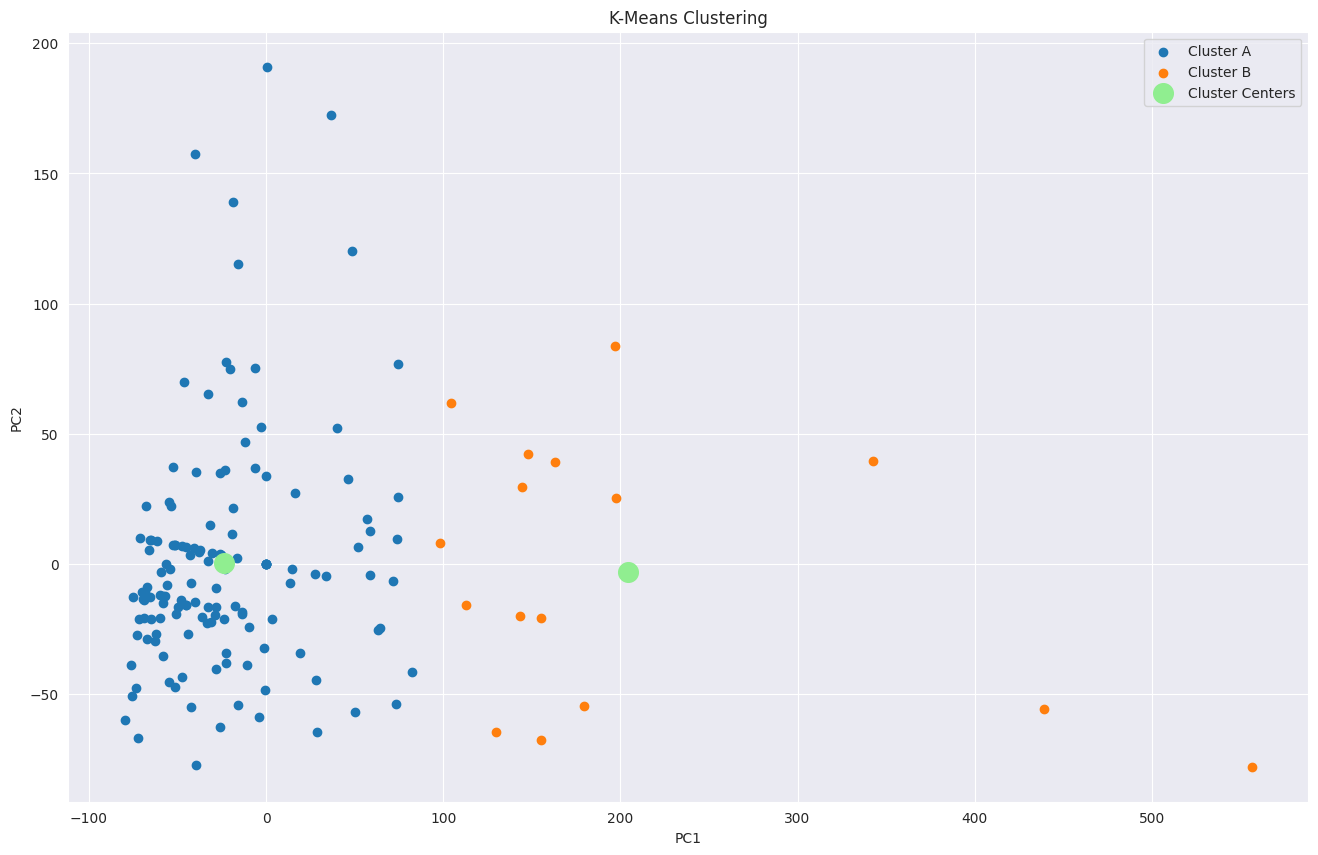

In [42]:
#separating different clusters
cluster_0_example=x_reduced.query("cluster==0")
cluster_1_example=x_reduced.query("cluster==1")


#creating scatter plot
plt.figure(figsize=(16,10))
plt.scatter(x=cluster_0_example['PC1'],y=cluster_0_example['PC2'],label='Cluster A')
plt.scatter(x=cluster_1_example['PC1'],y=cluster_1_example['PC2'],label='Cluster B')
plt.scatter(centroids[:,0],centroids[:,1],c='lightgreen',s=200,label='Cluster Centers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [45]:
x_reduced.query("label=='live'")

,PC1,PC2,label,cluster
0,-0.139273,33.906289,live,0
1,-47.312210,-43.626372,live,0
2,-68.051090,-10.943418,live,0
5,-33.397819,-22.922472,live,0
6,-25.571303,3.567125,live,0
...,...,...,...,...
150,-31.520122,14.978848,live,0
151,57.084448,17.289667,live,0
152,179.363050,-54.676630,live,1
153,0.278226,191.007394,live,0


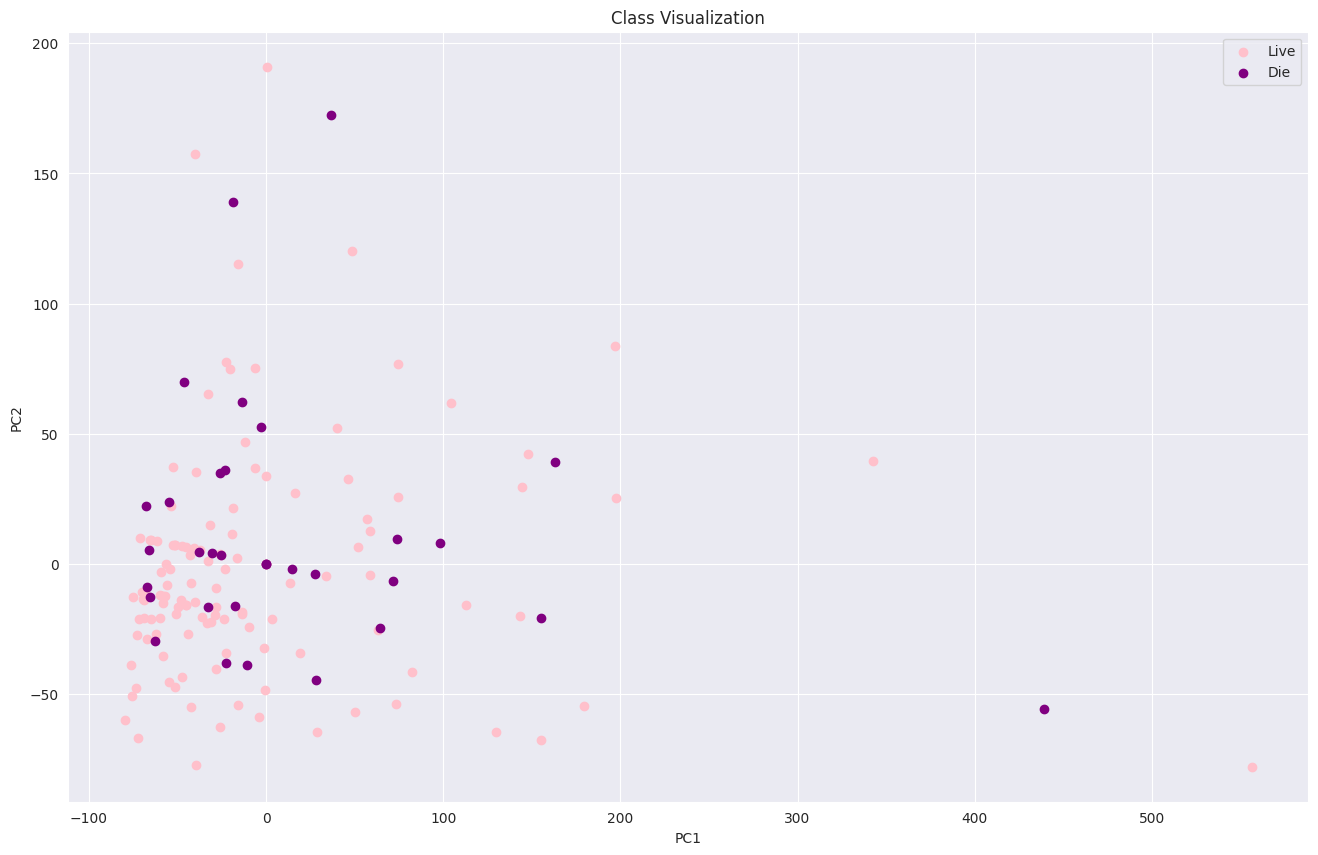

In [46]:
#separating different clusters
live_example=x_reduced.query("label=='live'")
die_example=x_reduced.query("label=='die'")


#creating scatter plot
plt.figure(figsize=(16,10))
plt.scatter(x=live_example['PC1'],y=live_example['PC2'],label='Live',c='pink')
plt.scatter(x=die_example['PC1'],y=die_example['PC2'],label='Die',c='purple')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Class Visualization')
plt.legend()
plt.show()

# Training the Model# 

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)
#scaling the datas with standardscaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)
x_train

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
35,0.298367,2.969542,-1.077033,-0.447214,0.707107,1.139242,-0.563093,0.476731,-0.782266,2.035401,-0.707107,-0.385922,-0.369922,-0.364270,-0.388172,-0.134509,-0.033279,0.029602,-0.861357
118,-0.815536,-0.336752,0.928477,2.236068,-1.414214,-0.877777,-0.563093,0.476731,-0.782266,-0.491304,-0.707107,-0.385922,-0.369922,-0.643219,-1.189169,-0.364986,0.249182,1.096174,-0.861357
46,-0.417713,-0.336752,-1.077033,-0.447214,0.707107,1.139242,1.775907,0.476731,1.278337,-0.491304,-0.707107,-0.385922,-0.369922,-0.364270,0.029279,-0.435132,0.249182,-0.255574,-0.861357
150,2.446607,-0.336752,0.928477,2.236068,0.707107,-0.877777,-0.563093,0.476731,1.278337,-0.491304,-0.707107,-0.385922,-0.369922,-0.364270,0.227979,-0.364986,-0.678268,-0.666976,1.160959
62,-1.054229,-0.336752,-1.077033,-0.447214,0.707107,1.139242,1.775907,0.476731,1.278337,-0.491304,-0.707107,-0.385922,-0.369922,0.193628,-1.230246,0.346488,0.249182,-0.902062,-0.861357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,1.969221,-0.336752,0.928477,-0.447214,0.707107,-0.877777,-0.563093,0.476731,-0.782266,-0.491304,-0.707107,-0.385922,-0.369922,-0.178304,-0.039020,-0.354966,0.712906,0.029602,-0.861357
98,-0.895100,-0.336752,0.928477,-0.447214,0.707107,1.139242,1.775907,0.476731,1.278337,-0.491304,1.414214,2.591194,2.703274,1.030474,1.254898,-0.244737,-1.605718,0.029602,1.160959
66,2.923994,-0.336752,0.928477,-0.447214,0.707107,-0.877777,-0.563093,0.476731,-0.782266,-0.491304,-0.707107,-0.385922,-0.369922,-0.643219,-0.162250,-0.565402,0.249182,0.029602,-0.861357
126,-0.895100,-0.336752,0.928477,-0.447214,0.707107,-0.877777,-0.563093,0.476731,1.278337,-0.491304,-0.707107,-0.385922,-0.369922,0.751526,-0.963247,0.556924,1.640356,0.978631,-0.861357


In [53]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
print('Test Accuracy: {:.2f}%'.format(model.score(x_test,y_test)*100))

Test Accuracy: 91.49%


In [38]:
cluster_0_example

,PC1,PC2,label,cluster
0,-0.139273,33.906289,live,0
1,-47.312210,-43.626372,live,0
2,-68.051090,-10.943418,live,0
3,-25.394887,3.526035,die,0
4,-62.618380,-29.828045,die,0
...,...,...,...,...
149,-57.290660,-12.441333,live,0
150,-31.520122,14.978848,live,0
151,57.084448,17.289667,live,0
153,0.278226,191.007394,live,0


In [39]:
cluster_1_example

,PC1,PC2,label,cluster
16,143.612157,-20.113374,live,1
38,439.354266,-55.922237,die,1
48,104.476971,61.958729,live,1
52,112.883351,-15.810601,live,1
54,147.998952,42.115706,live,1
61,155.266431,-67.822476,live,1
67,556.565022,-77.959780,live,1
73,129.595460,-64.558001,live,1
80,196.753568,83.691054,live,1
94,154.986306,-20.827116,die,1


In [32]:
#concating the reduced features,clustered labels and class into one column
x_reduced=pd.concat([k_reduced,y,pd.Series(clusters_labels,name='cluster')],axis=1)
x_reduced


,PC1,PC2,label,cluster
0,-0.139273,33.906289,live,0
1,-47.312210,-43.626372,live,0
2,-68.051090,-10.943418,live,0
3,-25.394887,3.526035,die,0
4,-62.618380,-29.828045,die,0
...,...,...,...,...
150,-31.520122,14.978848,live,0
151,57.084448,17.289667,live,0
152,179.363050,-54.676630,live,1
153,0.278226,191.007394,live,0


In [19]:
#checking the missing values in each columns
x.isna().sum(axis=0)

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [11]:
#checking the missing value as percentage for each column
df.isna().mean(axis=0)

age                0.000000
sex                0.000000
steroid            0.006452
antivirals         0.000000
fatigue            0.006452
malaise            0.006452
anorexia           0.006452
liver_big          0.064516
liver_firm         0.070968
spleen_palpable    0.032258
spiders            0.032258
ascites            0.032258
varices            0.032258
bilirubin          0.038710
alk_phosphate      0.187097
sgot               0.025806
albumin            0.103226
protime            0.432258
histology          0.000000
class              0.000000
dtype: float64